<a href="https://colab.research.google.com/github/sim-so/HandsOnML/blob/main/04_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 모델 훈련

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1. 선형 회귀 Linear Regression

In [3]:

X = 2 * np.random.rand(100, 1)              # uniform distribution
y = 4 + 3 * X + np.random.randn(100, 1)     # standard normal distribution

In [4]:
X_b = np.c_[np.ones((100, 1)), X]           # add x0 = 1 to every sample
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.99911283],
       [3.08395088]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.99911283],
       [10.16701458]])

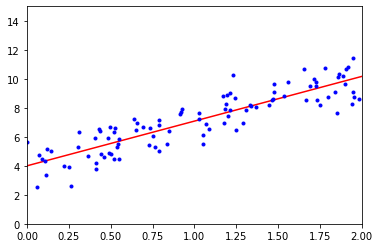

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.99911283] [[3.08395088]]
[[ 3.99911283]
 [10.16701458]]


In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.99911283],
       [3.08395088]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.99911283],
       [3.08395088]])

## 2. 경사 하강법 Gradient Descent


### 2-1 배치 경사하강법

In [14]:
eta = 0.1                       # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [15]:
theta

array([[3.99911283],
       [3.08395088]])

### 2-2 확률적 경사 하강법 (SGD)

In [17]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[4.03950575],
       [3.09693436]])

In [22]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,  penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [23]:
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.9396401] [3.04616874]


### 2-3 미니배치 경사 하강법

## 3. 다항 회귀

In [24]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.21205355]
[1.21205355 1.46907381]


In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.15683053]), array([[0.97997999, 0.47892466]]))

## 4. 학습 곡선

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")

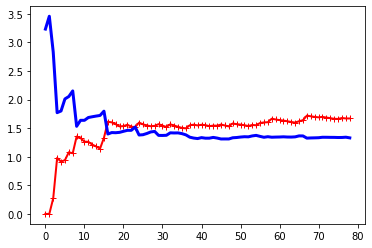

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

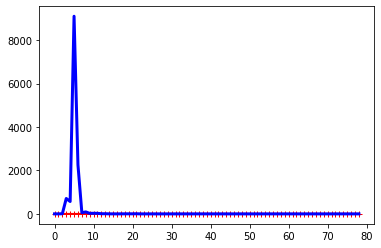

In [37]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)